# Data Visualization Lab

Welcome to this hands-on lab on Data Visualization using Python.

## In this session:
- Understand why visualization is essential in data science
- Compare **matplotlib** and **seaborn**
- Explore **plot anatomy** and aesthetics
- Study **Anscombe's Quartet** and why statistics alone aren't enough
- Build clean and insightful charts from scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# improved plot clarity for Jupyter notebooks
#%config InlineBackend.figure_format = 'retina'

# global themes
#sns.set_theme(style="whitegrid")
#plt.style.use("seaborn-v0_8-whitegrid")

## 📊 Anscombe's Quartet

This is a classical example of why statistics can't stand alone. The Anscombe's Quartet contains four datasets with nearly identical summary statistics (mean, variance, correlation), but very different distributions.

This demonstrates why **visualizing** your data is critical even when summary statistics seem to tell a certain story.

In [2]:
anscombe = sns.load_dataset("anscombe")
print(anscombe)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [3]:
# gruping the dataset to calculate summary stats
summary = anscombe.groupby("dataset").agg(
    mean_x=('x', 'mean'),
    mean_y=('y', 'mean'),
    var_x=('x', 'var'),
    var_y=('y', 'var'),
    corr_xy=('x', lambda x: anscombe.loc[x.index, 'x'].corr(anscombe.loc[x.index, 'y']))
)

print("Summary Statistics for Anscombe's Quartet:")
display(summary)


Summary Statistics for Anscombe's Quartet:


,mean_x,mean_y,var_x,var_y,corr_xy
dataset,,,,,
I,9.0,7.500909,11.0,4.127269,0.816421
II,9.0,7.500909,11.0,4.127629,0.816237
III,9.0,7.500000,11.0,4.122620,0.816287
IV,9.0,7.500909,11.0,4.123249,0.816521


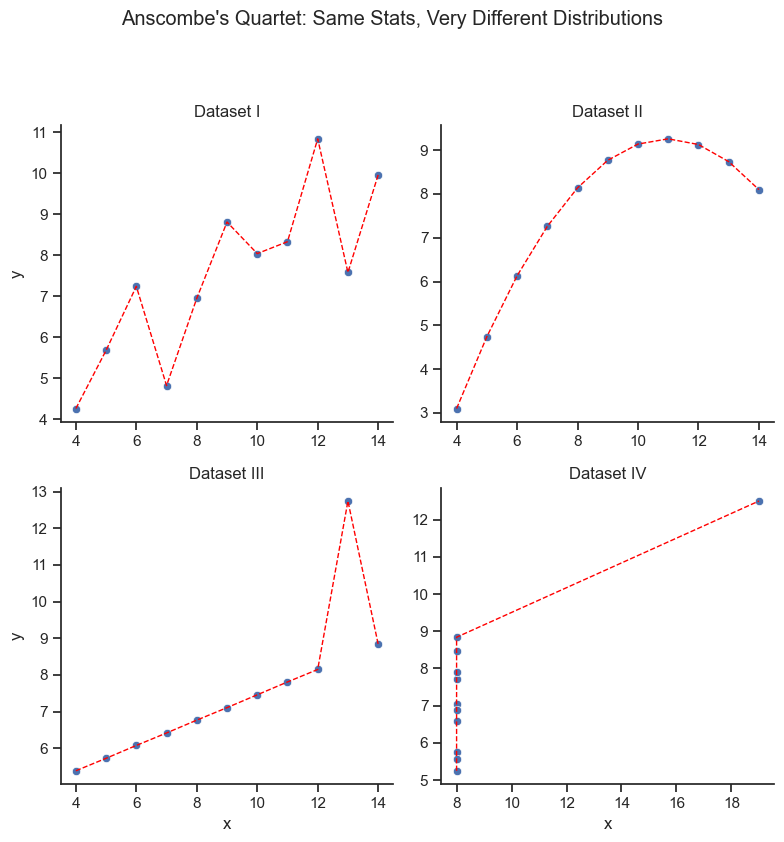

In [4]:
sns.set(style="ticks")
g = sns.FacetGrid(anscombe, col="dataset", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="x", y="y")
g.map_dataframe(sns.lineplot, x="x", y="y", estimator=None, color="red", lw=1, linestyle="--")
g.set_titles("Dataset {col_name}")
g.set_axis_labels("x", "y")
g.fig.suptitle("Anscombe's Quartet: Same Stats, Very Different Distributions", y=1.05)
plt.tight_layout()
plt.show()

## 🛠️ Matplotlib plot anatomy

A `matplotlib` plot is made of **Figure**, **Axes**, **Labels**, **Ticks**, **Legend**, and **Annotations**. You must define all elements explicitly.

Here is how to build a custom chart piece by piece:

In [5]:
# loading the dataset
df = pd.read_excel("ug_immigrant_workers.xlsx")

In [6]:
df.head()

,Country of Origin,2016,2017,2018,2019,2020
0,India,3473,4053,4056,5484,3682
1,China,2098,2414,2653,3261,1358
2,USA,815,850,757,913,533
3,Kenya,623,763,646,884,639
4,Germany,340,302,256,408,139


In [7]:
# reshaping dataframe to long format
df_long = df.melt(id_vars="Country of Origin", var_name="Year", value_name="Immigrant Workers")
df_long["Year"] = df_long["Year"].astype(int)
print(df_long)

   Country of Origin  Year  Immigrant Workers
0              India  2016               3473
1              China  2016               2098
2                USA  2016                815
3              Kenya  2016                623
4            Germany  2016                340
..               ...   ...                ...
60            France  2020                 95
61             Japan  2020                 63
62      South Africa  2020                 74
63            Others  2020               2360
64             Total  2020               9633

[65 rows x 3 columns]


In [8]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country of Origin  65 non-null     object
 1   Year               65 non-null     int32 
 2   Immigrant Workers  65 non-null     int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 1.4+ KB


In [9]:
# only do this if you want spacing equalized for years (not ideal for trendlines)
df_long["Year"] = df_long["Year"].astype(str)

In [10]:
# creating the figure and axes
# this is the foundation of any matplotlib plot.
# the figure is the entire canvas
fig = plt.figure(figsize=(8, 6))
plt.show()

<Figure size 800x600 with 0 Axes>

This is the overall layout space, a container where one or more plots (called Axes) will be placed. Alone, it’s just a blank canvas.

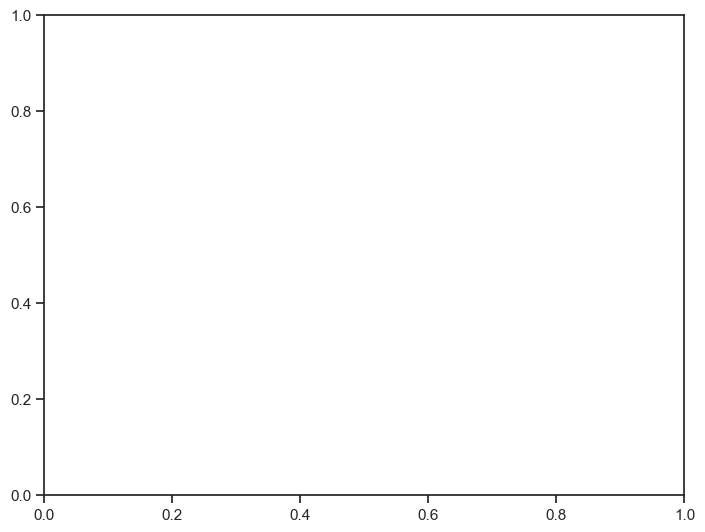

In [11]:
# adding one Axes manually to the figure
# Axes is the actual plot area — the box where data gets drawn.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # [left, bottom, width, height] in 0–1 figure coords
plt.show()

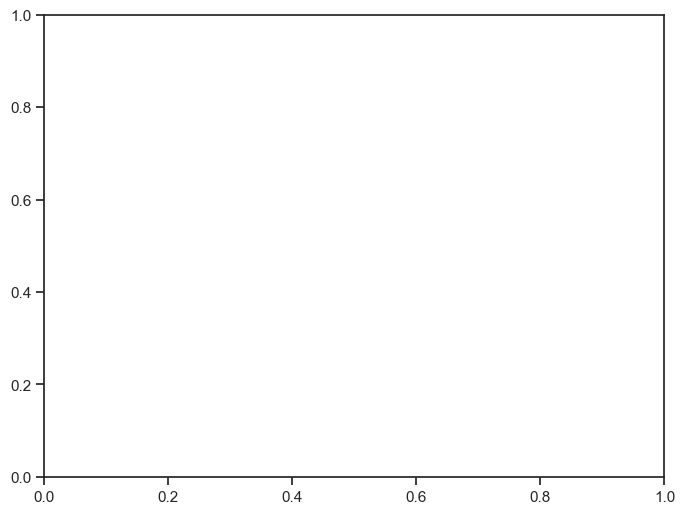

In [12]:
# common shortcut — creates both Figure and Axes together
fig, ax = plt.subplots(figsize=(8, 6))
plt.show()

In [13]:
# adding a line for India's immigrant worker data
india = df_long[df_long["Country of Origin"] == "India"]

# top countries
top_countries = ["India", "China", "USA"]
df_top = df_long[df_long["Country of Origin"].isin(top_countries)]

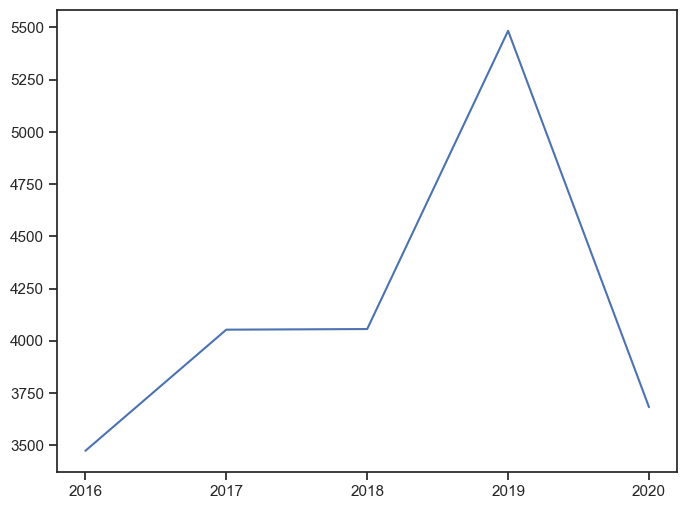

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(india["Year"], india["Immigrant Workers"])
plt.show()

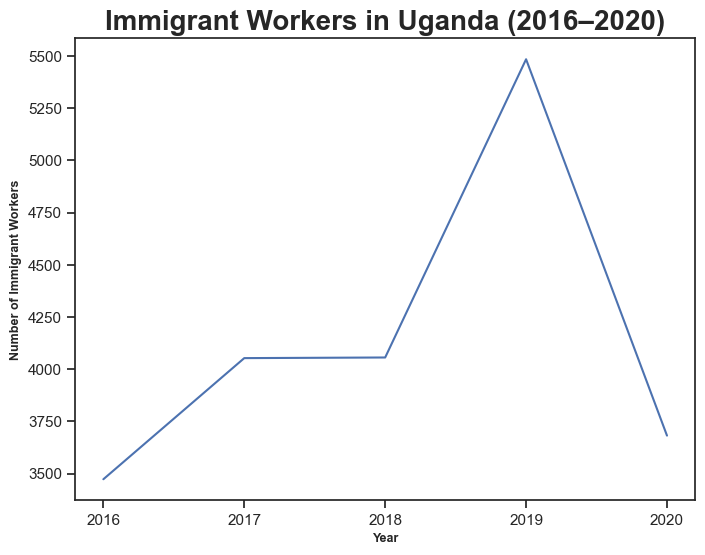

In [20]:
# adding a label to the plot line — needed for legends
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(india["Year"], india["Immigrant Workers"], label="India")
ax.set_xlabel("Year", fontweight = 'semibold', fontsize='9')
ax.set_ylabel("Number of Immigrant Workers", fontweight = 'semibold', fontsize='9')
ax.set_title("Immigrant Workers in Uganda (2016–2020)", fontweight='bold', fontsize=20)
plt.show()

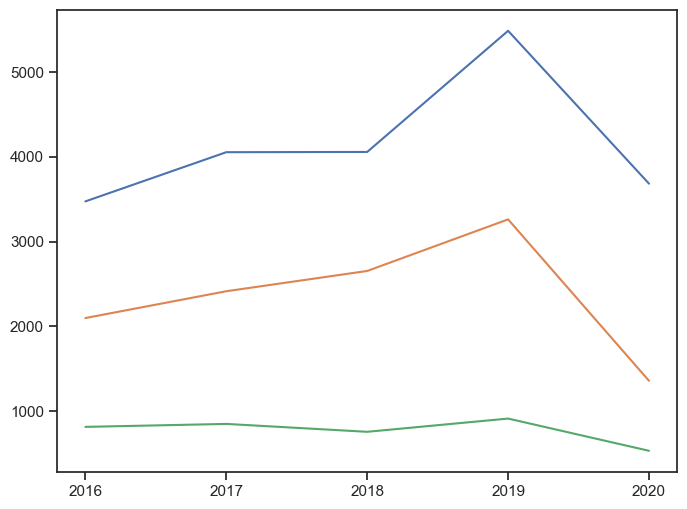

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
for country in top_countries:
    subset = df_top[df_top["Country of Origin"] == country]
    ax.plot(subset["Year"], subset["Immigrant Workers"], label=country)
plt.show()

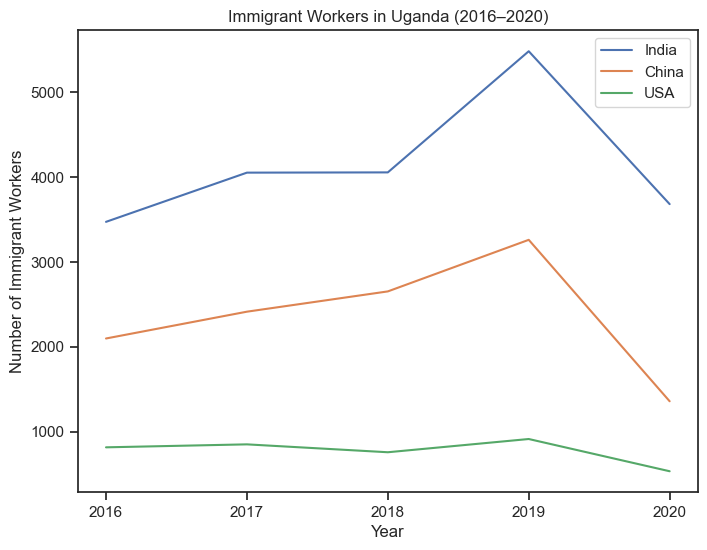

In [21]:
# showing labels and the legend
fig, ax = plt.subplots(figsize=(8, 6))
for country in top_countries:
    subset = df_top[df_top["Country of Origin"] == country]
    ax.plot(subset["Year"], subset["Immigrant Workers"], label=country)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Immigrant Workers")
ax.set_title("Immigrant Workers in Uganda (2016–2020)")
ax.legend()
plt.show()

## Seaborn
Seaborn is a plotting library built on top of Matplotlib.

It provides a simpler and cleaner interface for creating common visualizations, especially when working with Pandas DataFrames. With just one line of code, Seaborn can group data, apply color themes, and produce polished charts.

While Matplotlib gives full control, Seaborn makes it faster to create attractive, statistical plots with less effort.

We’ll now recreate our earlier plot using Seaborn to show how much easier and more expressive it can be.

<Axes: xlabel='Year', ylabel='Immigrant Workers'>

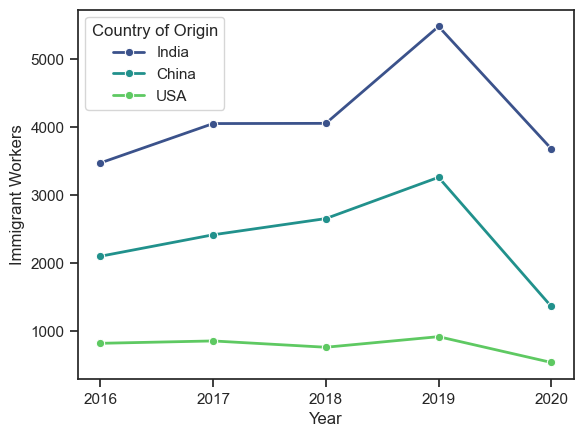

In [31]:
sns.lineplot(data=df_top, x="Year", y="Immigrant Workers", hue="Country of Origin", palette='viridis', marker="o", linewidth=2)

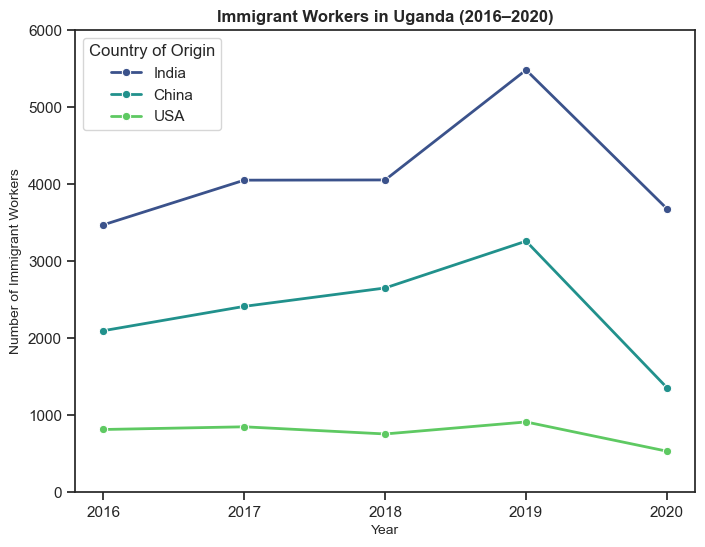

In [33]:
plt.figure(figsize=(8, 6))
plot = sns.lineplot(data=df_top, x="Year", y="Immigrant Workers", hue="Country of Origin", palette='viridis', marker="o", linewidth=2)
plot.set_title("Immigrant Workers in Uganda (2016–2020)", fontsize=12, fontweight='bold')
plot.set_xlabel("Year", fontsize=10)
plot.set_ylabel("Number of Immigrant Workers", fontsize=10)
#plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.ylim(0, 6000)
#plt.tight_layout()
plt.show()

In [ ]:
# setting theme and color palette
sns.set_theme(style="white")
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))
plot = sns.lineplot(data=filtered, x="Year", y="Immigrant Workers", hue="Country of Origin", marker="o", linewidth=2)

# titles and labels
plot.set_title("Immigration Trends in Uganda (2016–2020)", fontsize=14, fontweight='bold', loc='left')
plot.set_xlabel("Year", fontsize=12)
plot.set_ylabel("Number of Immigrant Workers", fontsize=12)

# tick marks and limits
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.ylim(0, 6000)

# legend customization
plt.legend(title="Country of Origin", loc='upper left')

# highlight
plt.axvspan(2018.9, 2019.1, color='orange', alpha=0.2, label="India's Peak Year")

# annotation
plt.annotate("Highest (India)", xy=(2019, 5484), xytext=(2017.5, 4500), arrowprops=dict(facecolor='yellow', arrowstyle='->', linewidth=1.5, mutation_scale=25), fontsize=10, ha='center')


plt.tight_layout()
plt.show()

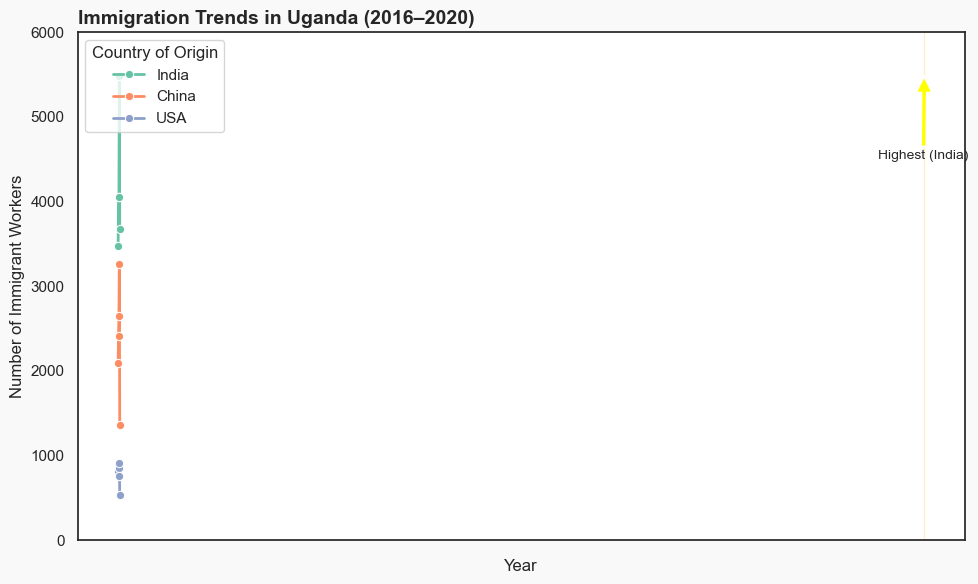

In [35]:
# Set Seaborn theme and palette
sns.set_theme(style="white")
sns.set_palette("Set2")

fig = plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get the axes object

# Set figure and axes background colors
fig.patch.set_facecolor('#f9f9f9')      # Overall figure background
ax.set_facecolor('#ffffff')             # Plot area background

# Create Seaborn line plot
plot = sns.lineplot(
    data=df_top,
    x="Year",
    y="Immigrant Workers",
    hue="Country of Origin",
    marker="o",
    linewidth=2
)

# Titles and labels
plot.set_title("Immigration Trends in Uganda (2016–2020)", fontsize=14, fontweight='bold', loc='left')
plot.set_xlabel("Year", fontsize=12)
plot.set_ylabel("Number of Immigrant Workers", fontsize=12)

# Tick marks and limits
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.ylim(0, 6000)

# Legend customization
plt.legend(title="Country of Origin", loc='upper left')

# Highlight
plt.axvspan(2018.9, 2019.1, color='orange', alpha=0.2, label="India's Peak Year")

# Annotation
plt.annotate("Highest (India)",
             xy=(2019, 5484),
             xytext=(2017.5, 4500),
             arrowprops=dict(facecolor='yellow', linewidth=1.5, mutation_scale=25),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()